In [207]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [208]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

## Data Loading and Initial Look

In [209]:
df_train.head(40)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,...,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,...,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,...,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died


In [210]:
df_train.shape

(1235, 29)

In [211]:
num_rows_tra = df_train.shape[0]
num_columns_tra = df_train.shape[1]

print("Number of rows:", num_rows_tra)
print("Number of columns:", num_columns_tra)

Number of rows: 1235
Number of columns: 29


In [212]:
df_train.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [213]:
df_train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [214]:
df_test.head(15)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
5,1240,yes,adult,530239,38.5,104.0,36.0,cool,normal,bright_red,...,distend_small,69.0,8.9,serosanguious,6.0,yes,2207,0,0,yes
6,1241,yes,adult,528548,40.8,114.0,36.0,cold,reduced,dark_cyanotic,...,distend_small,40.0,8.6,serosanguious,2.6,yes,2209,0,0,yes
7,1242,no,young,528503,40.3,114.0,36.0,cool,reduced,pale_cyanotic,...,NaN,48.0,7.0,serosanguious,2.8,yes,2209,0,0,yes
8,1243,yes,adult,5287179,38.3,66.0,12.0,cool,reduced,pale_pink,...,distend_large,39.0,6.0,serosanguious,3.4,yes,4205,0,0,no
9,1244,no,adult,527563,38.3,64.0,22.0,normal,normal,bright_pink,...,NaN,54.0,6.0,clear,1.0,no,0,0,0,no


In [215]:
df_test.shape

(824, 28)

In [216]:
num_rows_te = df_test.shape[0]
num_columns_te = df_test.shape[1]

print("Number of rows:", num_rows_te)
print("Number of columns:", num_columns_te)

Number of rows: 824
Number of columns: 28


In [217]:
df_test.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [218]:
df_test.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,824.000000,8.240000e+02,824.000000,824.000000,824.00000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.0
mean,1646.500000,1.108357e+06,38.244539,80.229369,30.71966,4.508495,49.063350,20.796238,3.336420,3709.803398,12.391990,0.0
std,238.012605,1.555627e+06,0.785234,29.164711,17.43191,1.883464,10.450138,26.413588,1.539235,5112.931057,197.067771,0.0
min,1235.000000,5.213990e+05,36.000000,36.000000,9.00000,1.000000,23.000000,3.900000,0.100000,0.000000,0.000000,0.0
25%,1440.750000,5.287430e+05,37.800000,54.000000,18.00000,3.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.0
50%,1646.500000,5.298085e+05,38.200000,76.000000,28.00000,4.500000,48.000000,7.500000,3.300000,2209.000000,0.000000,0.0
75%,1852.250000,5.346440e+05,38.600000,100.000000,36.00000,6.500000,55.000000,8.900000,4.300000,3205.000000,0.000000,0.0
max,2058.000000,5.305129e+06,40.800000,184.000000,96.00000,7.500000,75.000000,89.000000,10.100000,31110.000000,4300.000000,0.0


In [219]:
# Determining categorical and numerical
data_types = df_train.dtypes
categorical_features = data_types[data_types == 'object'].index.tolist()
numerical_features = data_types[data_types != 'object'].index.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data', 'outcome']
Numerical Features: ['id', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [220]:
# Looking at uniqu values
unique_value_counts = df_train.nunique()
threshold = 20
categorical_features = unique_value_counts[unique_value_counts < threshold].index.tolist()

print("Categorical Features:", categorical_features) 

Categorical Features: ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'lesion_2', 'lesion_3', 'cp_data', 'outcome']


In [221]:
numerical_features = df_train.select_dtypes(include=['int', 'float']).columns

# Calculate the range for each numerical feature
##(technically did this in the .describe() but wanted to show a list
### specifically for the range)
feature_ranges = {}
for feature in numerical_features:
    min_value = df_train[feature].min()
    max_value = df_train[feature].max()
    feature_ranges[feature] = (min_value, max_value)

print("Feature Ranges:")
for feature, (min_val, max_val) in feature_ranges.items():
    print(f"{feature}: [{min_val}, {max_val}]")

Feature Ranges:
id: [0, 1234]
hospital_number: [521399, 5305129]
rectal_temp: [35.4, 40.8]
pulse: [30.0, 184.0]
respiratory_rate: [8.0, 96.0]
nasogastric_reflux_ph: [1.0, 7.5]
packed_cell_volume: [23.0, 75.0]
total_protein: [3.5, 89.0]
abdomo_protein: [0.1, 10.1]
lesion_1: [0, 41110]
lesion_2: [0, 3112]
lesion_3: [0, 2209]


In [222]:
# Detecting outliers using IQR
outlier_info = []
for feature in df_train.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_train[feature].quantile(0.25)
    Q3 = df_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count of outliers
    outliers = df_train[(df_train[feature] < lower_bound) | (df_train[feature] > upper_bound)][feature]
    outlier_info.append((feature, len(outliers)))

# Print outlier information
print("\nOutlier counts per numerical feature:")
for feature, count in outlier_info:
    print(f"{feature}: {count} outliers")


Outlier counts per numerical feature:
id: 0 outliers
hospital_number: 110 outliers
rectal_temp: 72 outliers
pulse: 4 outliers
respiratory_rate: 57 outliers
nasogastric_reflux_ph: 0 outliers
packed_cell_volume: 0 outliers
total_protein: 300 outliers
abdomo_protein: 19 outliers
lesion_1: 306 outliers
lesion_2: 8 outliers
lesion_3: 2 outliers


In [223]:
# Check class balance for a categorical target variable
if 'outcome' in df_train.columns:
    print("\nClass distribution in 'outcome':")
    print(df_train['outcome'].value_counts())


Class distribution in 'outcome':
outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64


In [224]:
#Checking duplicated records
duplicates = df_train.duplicated().sum()
print('Number of Duplicated Entries: ',duplicates)

#Checking for Missing Values
missing_values = df_train.isnull().sum()
print("Missing values:\n", missing_values)
plt.show()

Number of Duplicated Entries:  0
Missing values:
 id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64


## Data Visualization

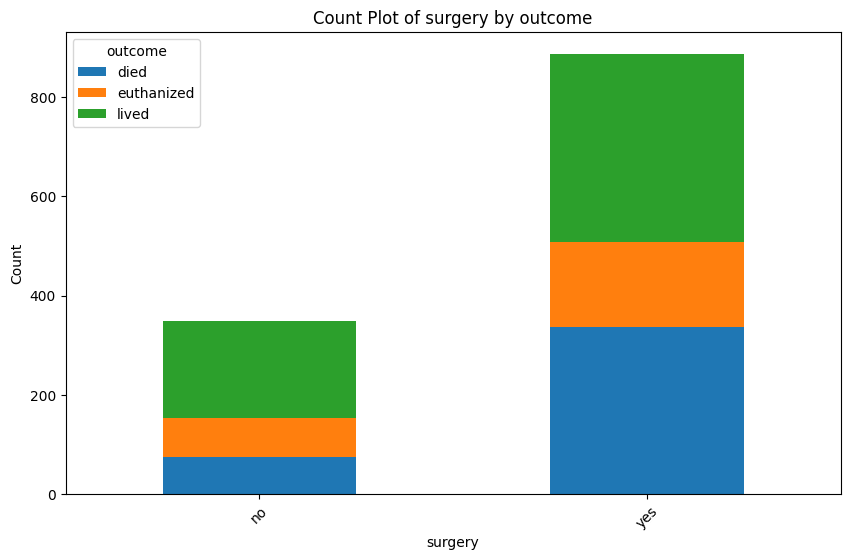

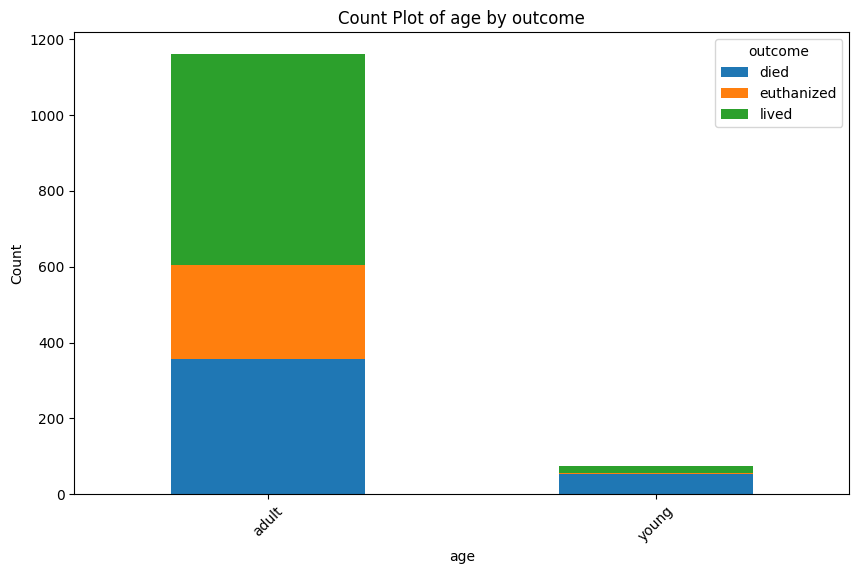

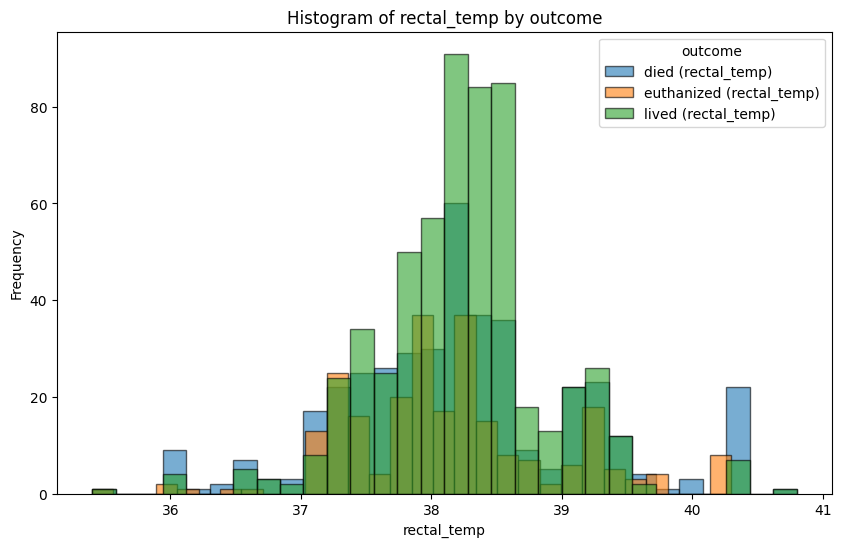

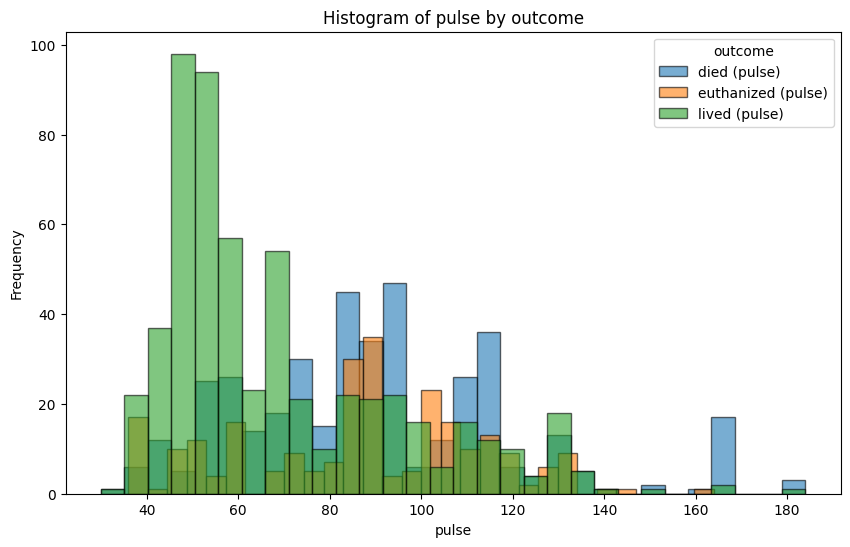

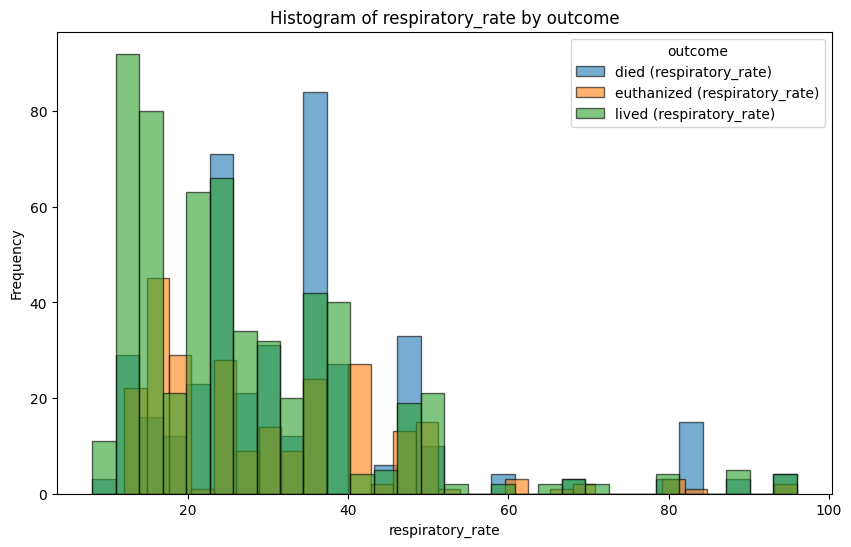

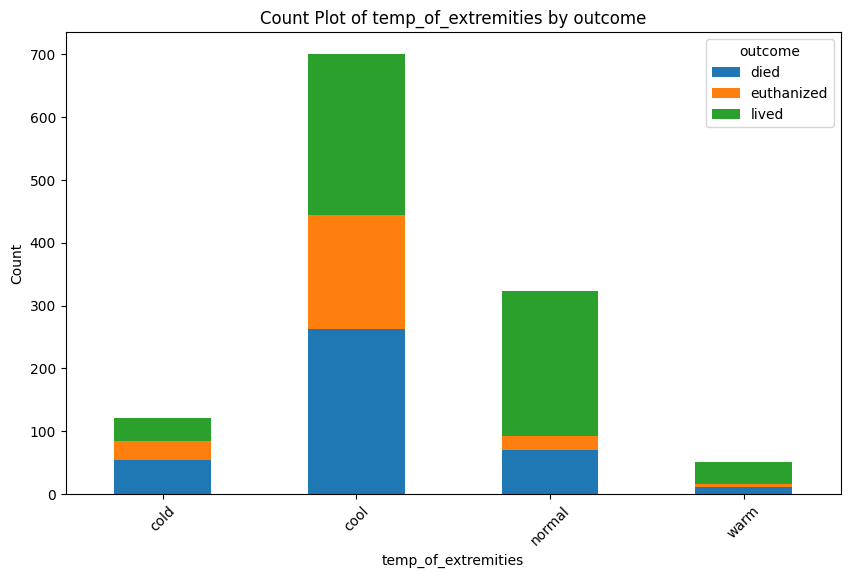

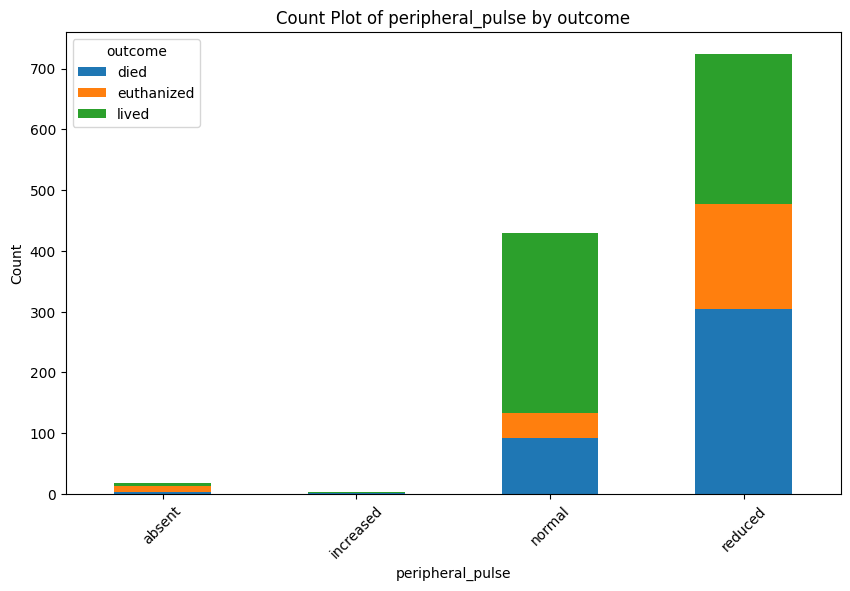

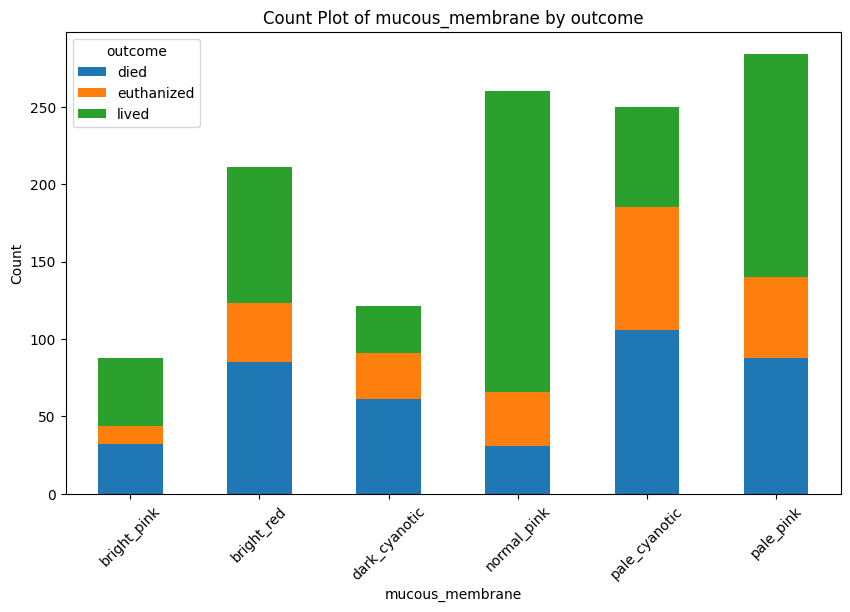

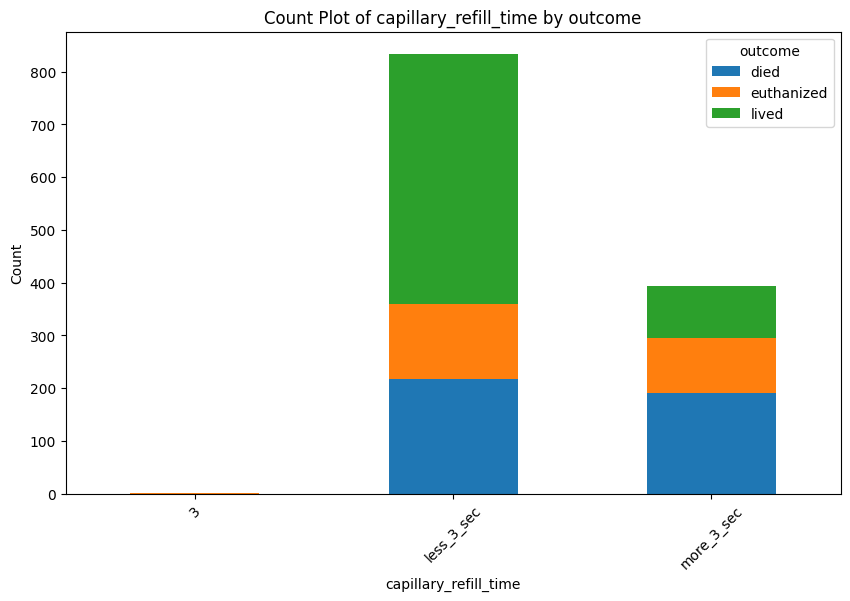

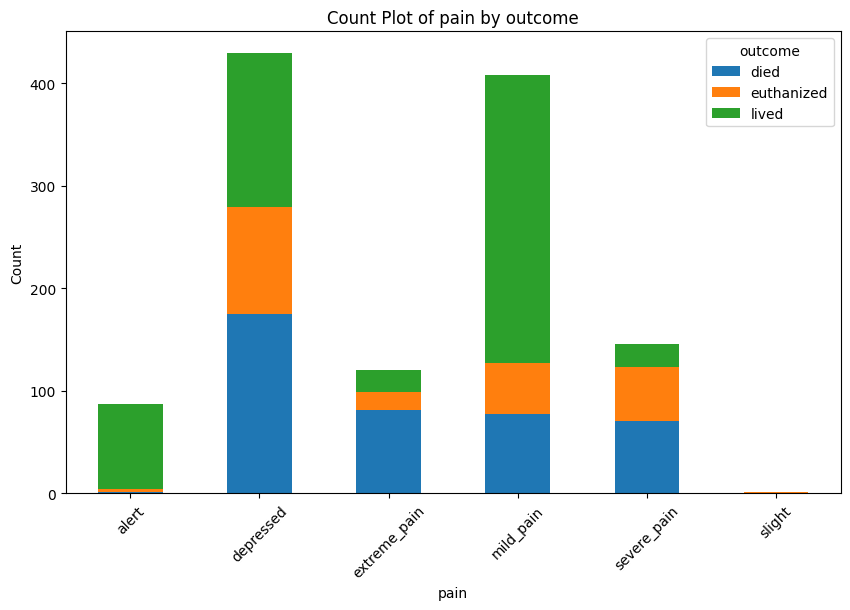

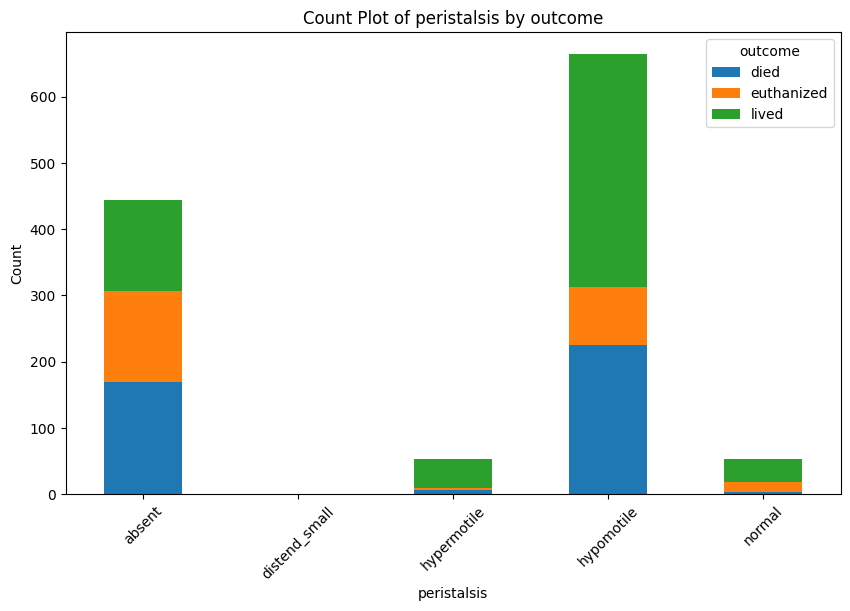

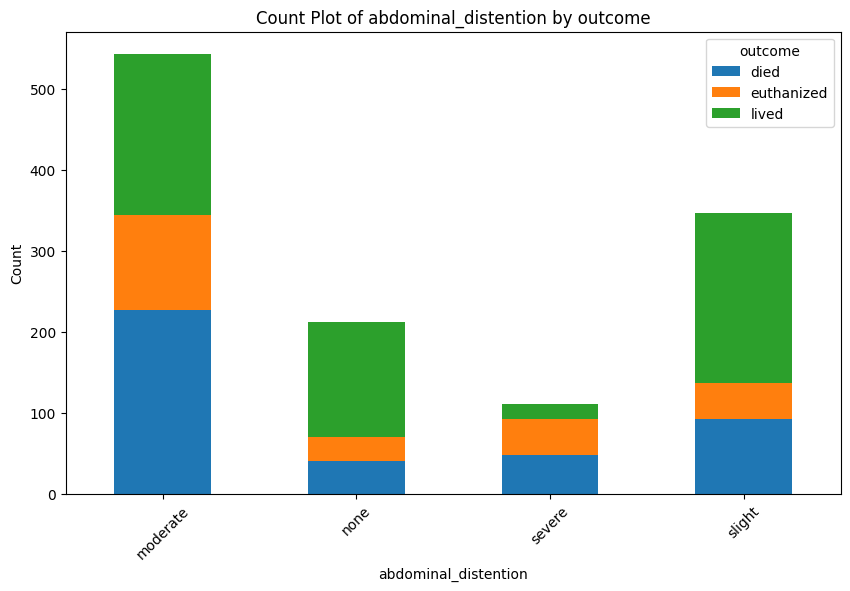

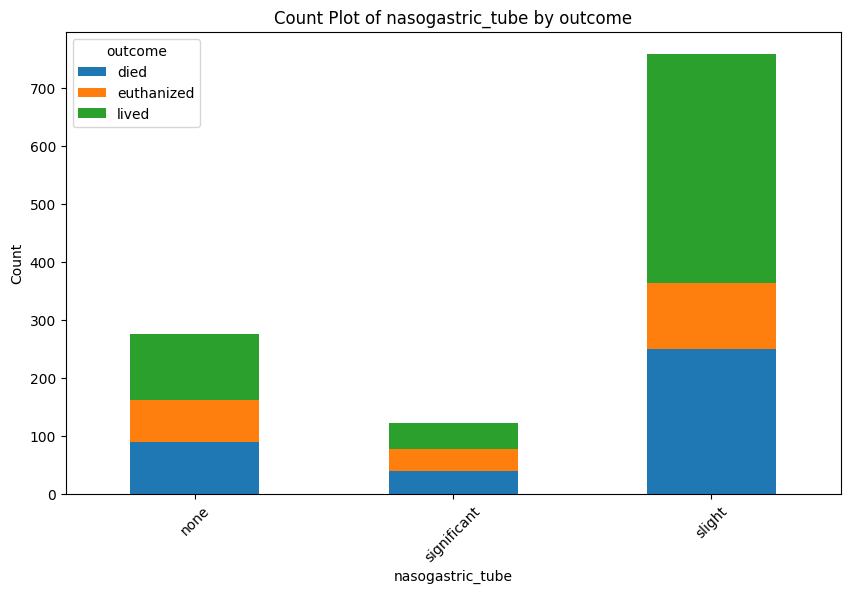

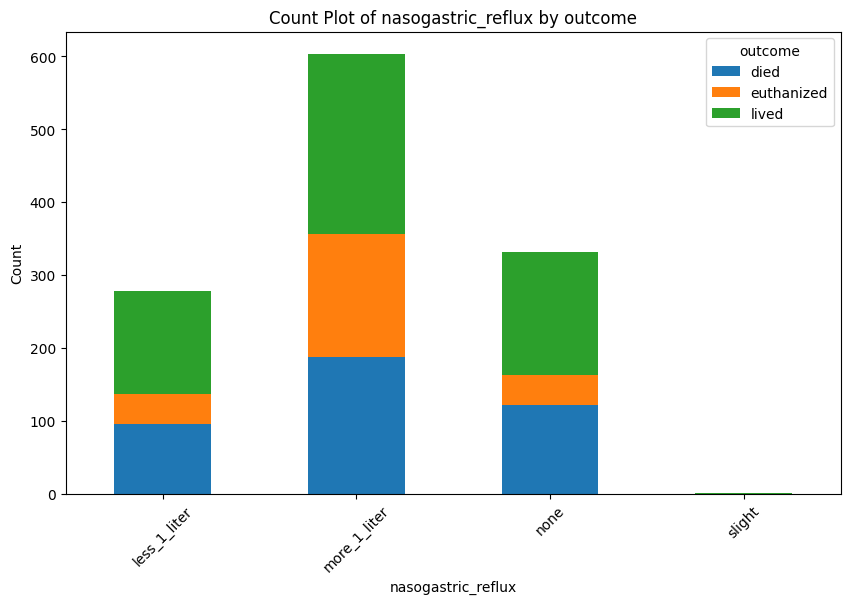

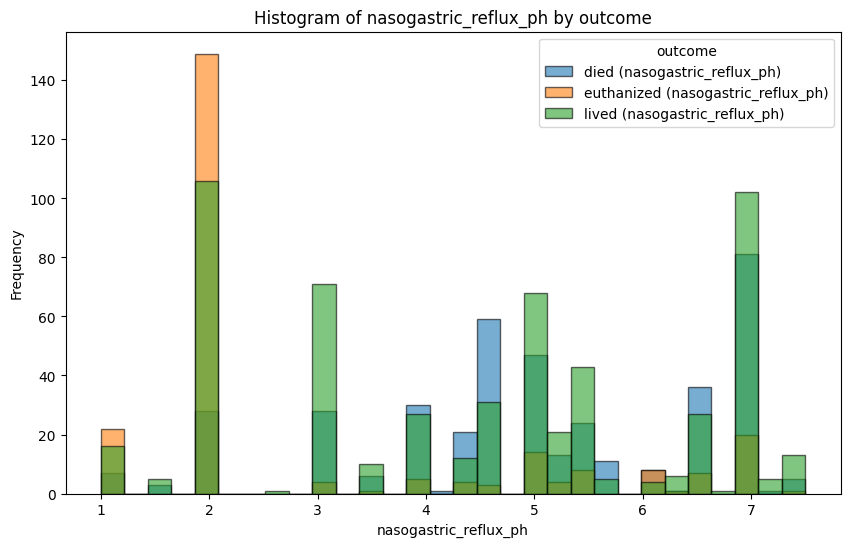

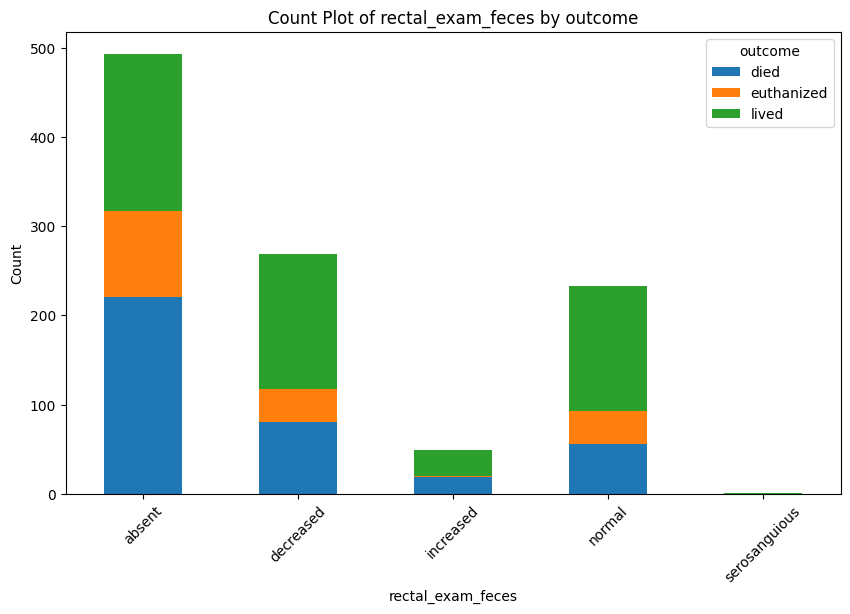

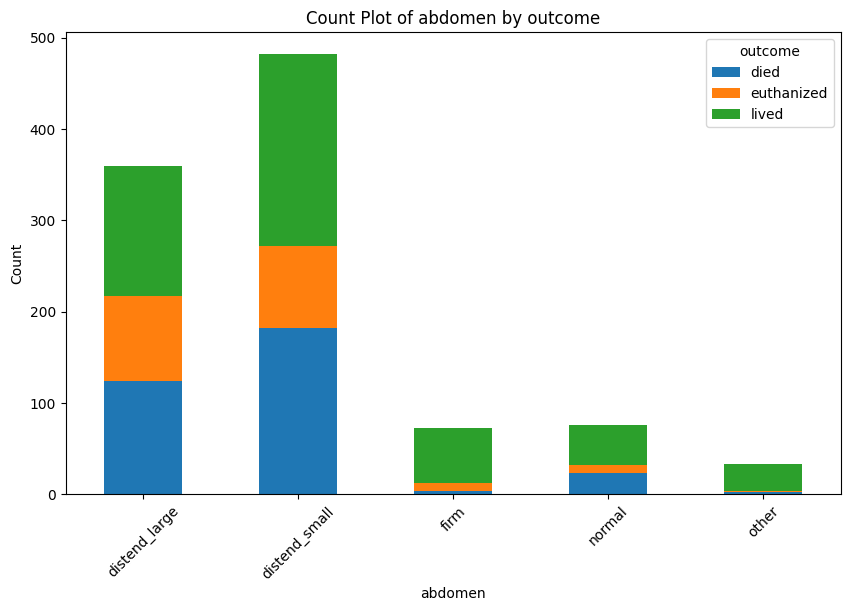

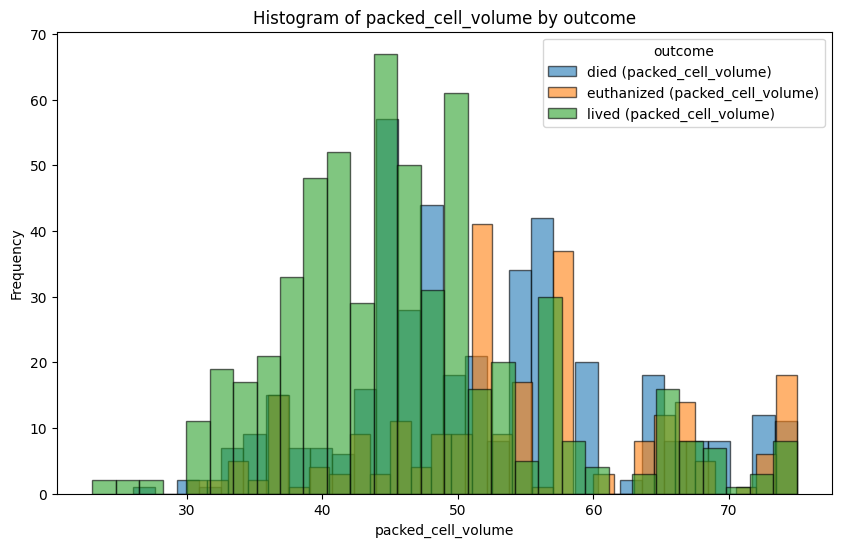

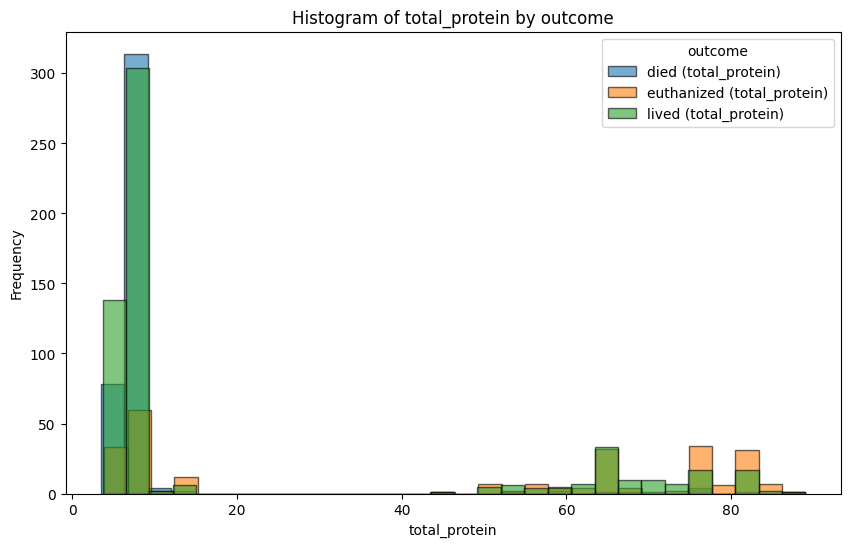

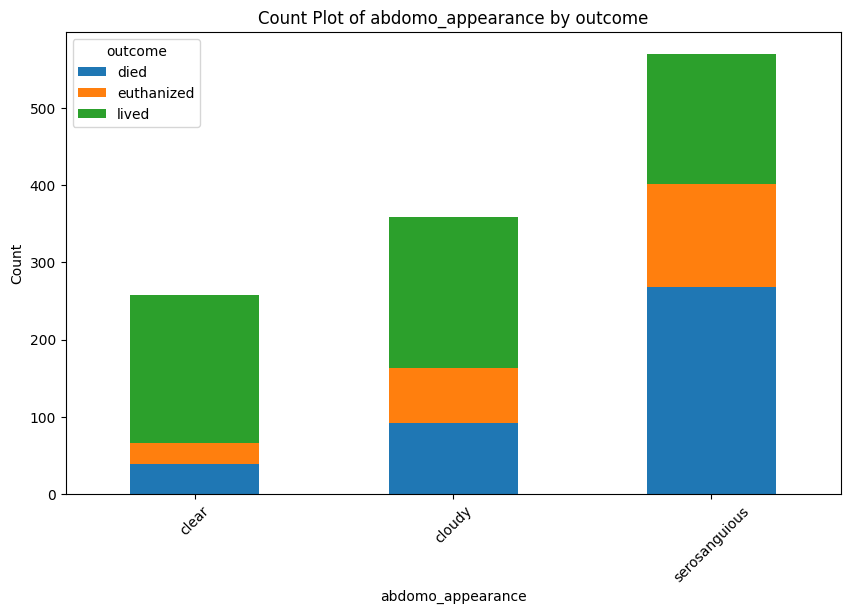

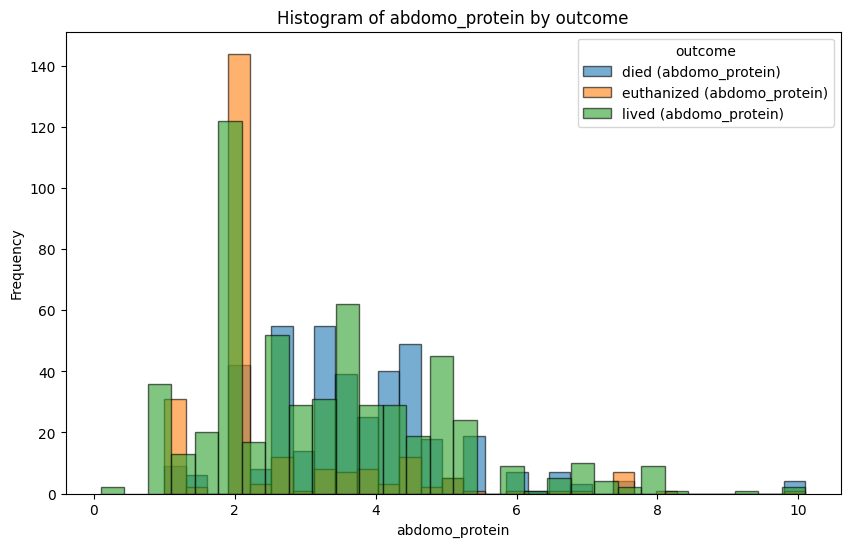

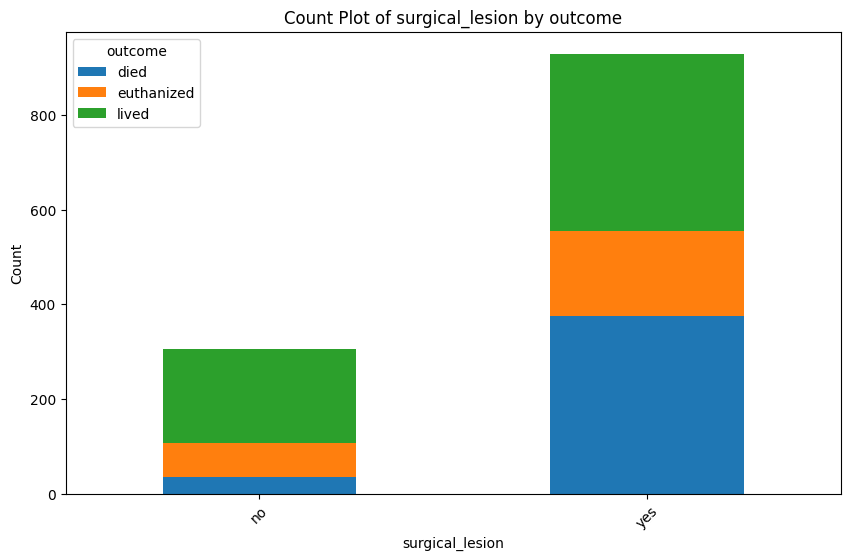

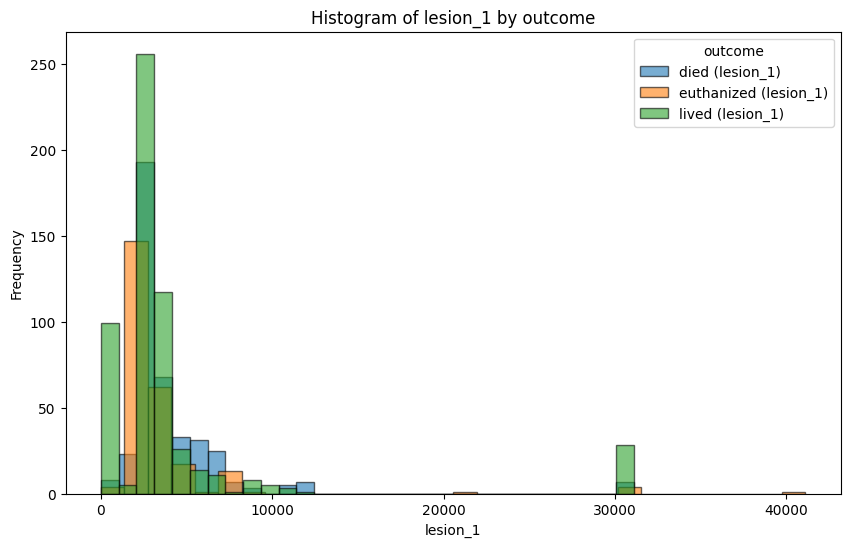

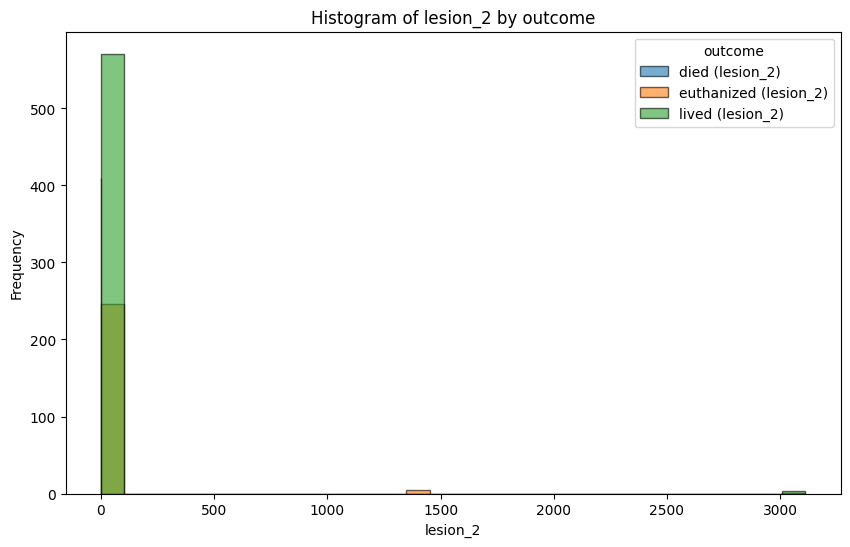

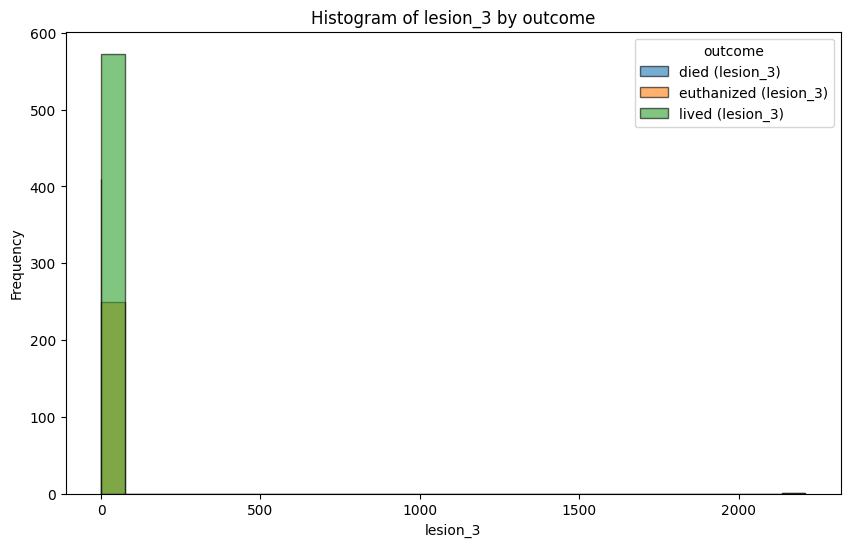

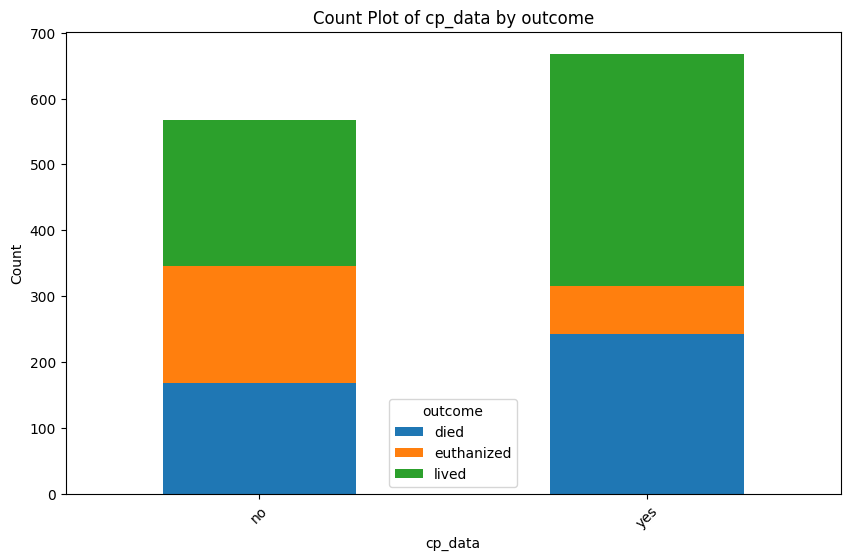

In [225]:
# Specify the target column
target_column = 'outcome'

# List of features to exclude from histogram plotting (e.g., IDs, non-informative features)
excluded_features = ['id', 'hospital_number']

# Create a histogram for each feature split by the target variable
for feature in df_train.columns:
    if feature not in excluded_features and feature != target_column:
        if df_train[feature].dtype == 'object':  # Categorical feature
            # Create a count plot for categorical features
            data_cross = pd.crosstab(df_train[feature], df_train[target_column])
            data_cross.plot(kind='bar', stacked=True, figsize=(10, 6))
            plt.title(f'Count Plot of {feature} by {target_column}')
            plt.ylabel('Count')
            plt.xlabel(feature)
            plt.xticks(rotation=45)
            plt.legend(title=target_column)
        else:  # Numerical feature
            # Create a histogram for numerical features
            plt.figure(figsize=(10, 6))
            for category in df_train[target_column].unique():
                subset = df_train[df_train[target_column] == category]
                plt.hist(subset[feature], alpha=0.6, label=f'{category} ({feature})', bins=30, edgecolor='black')

            plt.title(f'Histogram of {feature} by {target_column}')
            plt.ylabel('Frequency')
            plt.xlabel(feature)
            plt.legend(title=target_column)

        plt.show()

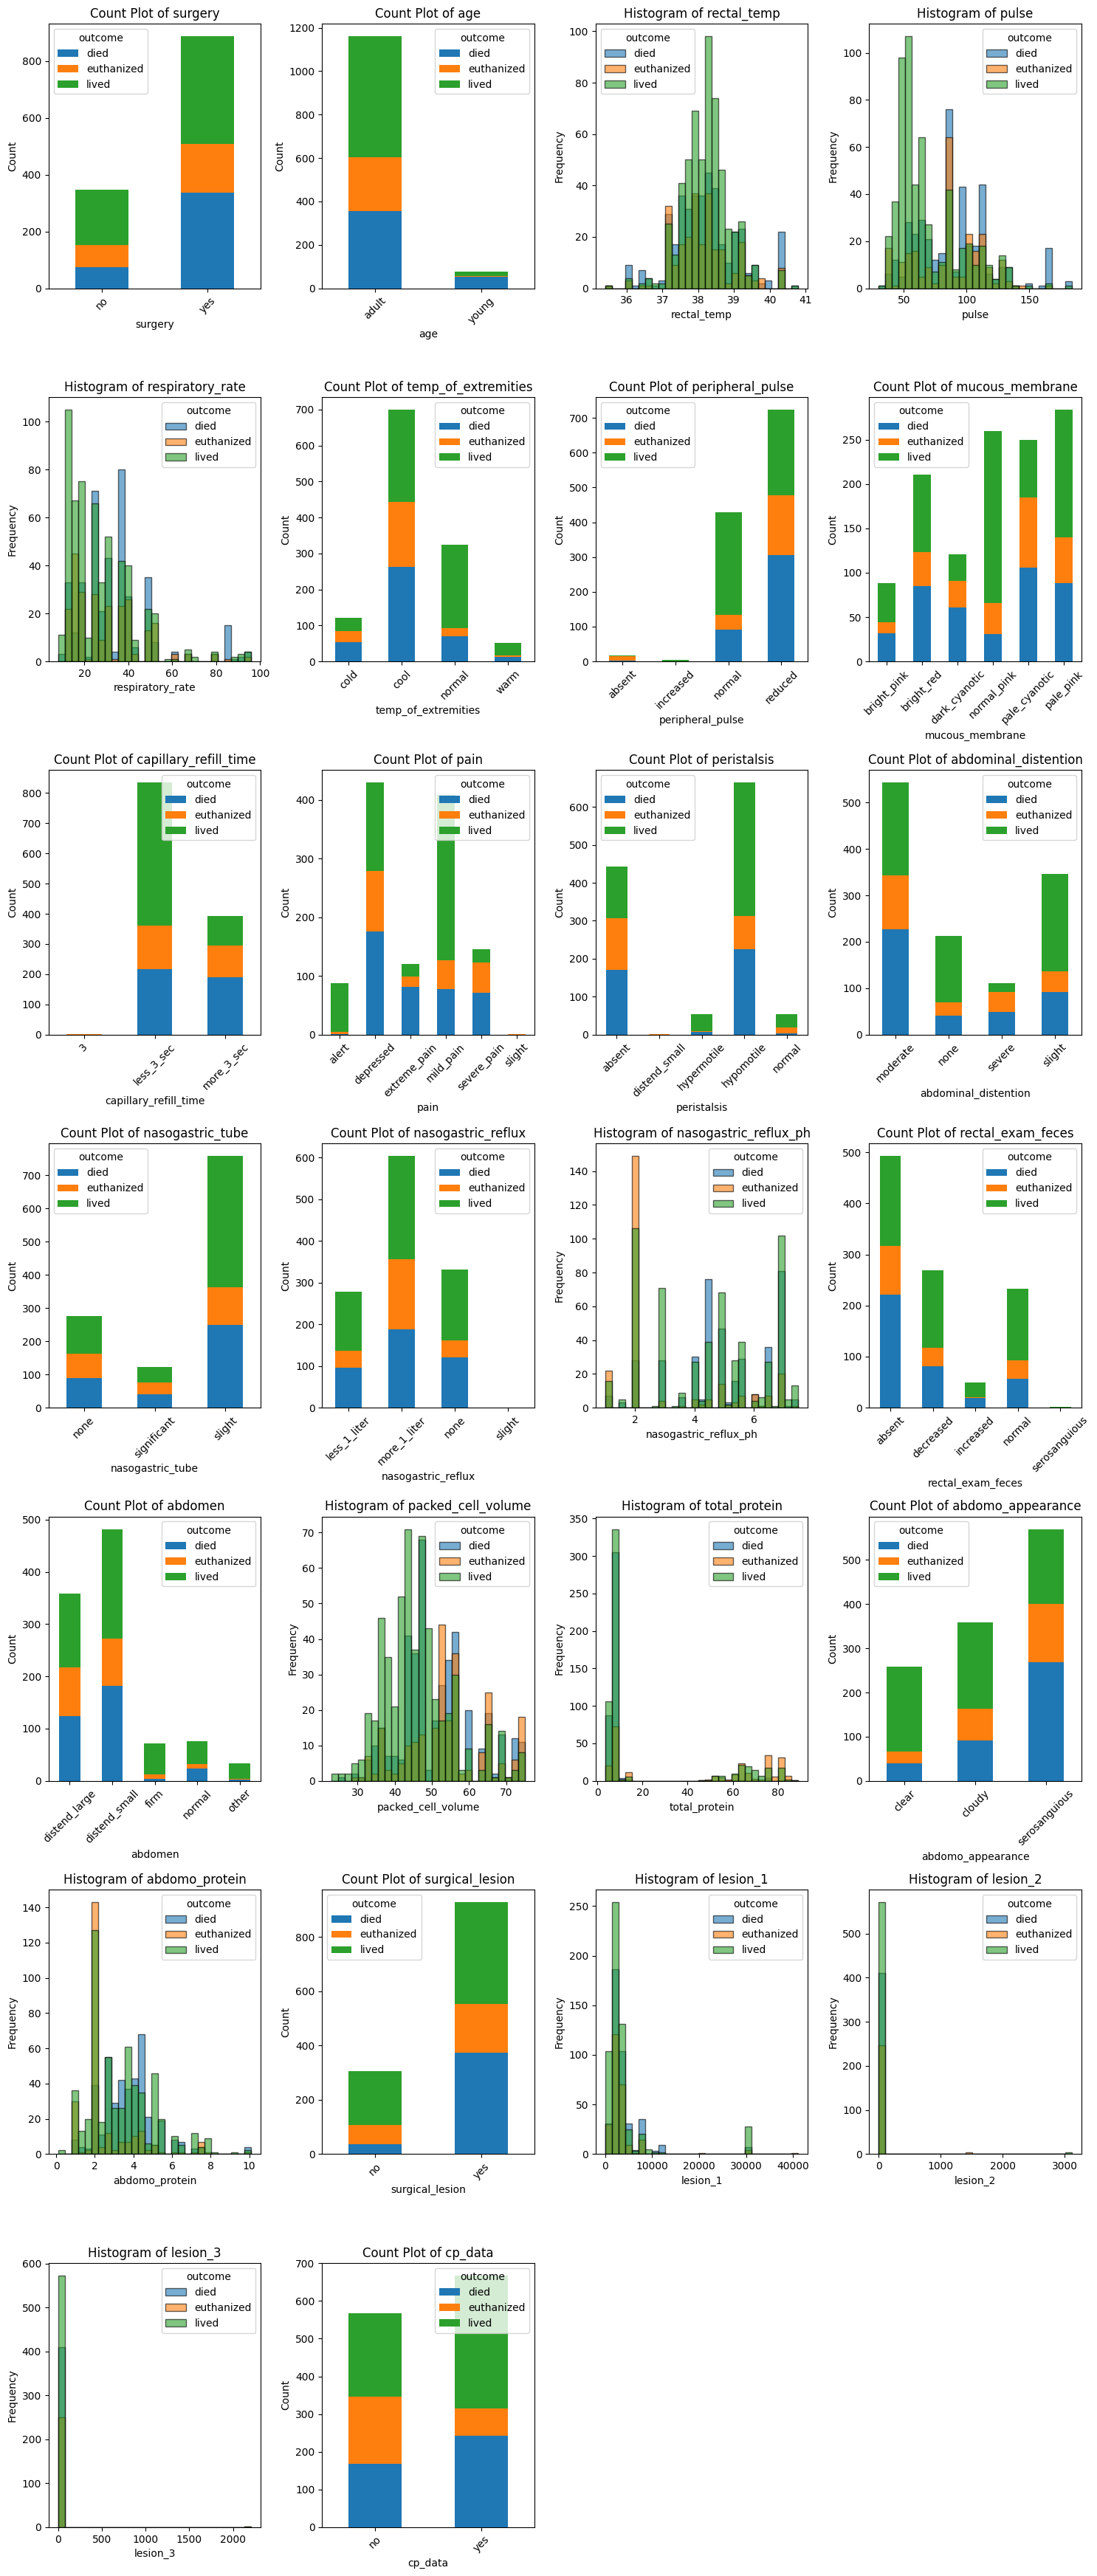

In [226]:
# Specify the target column
target_column = 'outcome' 

# List of features to exclude from histogram plotting (e.g., IDs, non-informative features)
excluded_features = ['id', 'hospital_number']

# Prepare the layout for subplots
features = [feature for feature in df_train.columns if feature not in excluded_features and feature != target_column]
num_features = len(features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration


# Create a histogram for each feature split by the target variable
for idx, feature in enumerate(features):
    ax = axes[idx]
    if df_train[feature].dtype == 'object':  # Categorical feature
        # Create a count plot for categorical features
        data_cross = pd.crosstab(df_train[feature], df_train[target_column])
        data_cross.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Count Plot of {feature}')
        ax.set_ylabel('Count')
        ax.set_xlabel(feature)
        ax.tick_params(axis='x', rotation=45)
    else:  # Numerical feature
        # Determine the overall range of values for the feature
        min_value = df_train[feature].min()
        max_value = df_train[feature].max()
        # Set the bins based on the overall range of values
        bins = np.linspace(min_value, max_value, 30)
        # Create a histogram for numerical features
        for category in df_train[target_column].unique():
            subset = df_train[df_train[target_column] == category]
            ax.hist(subset[feature], alpha=0.6, label=f'{category}', bins=bins, edgecolor='black')
        ax.set_title(f'Histogram of {feature}')
        ax.set_ylabel('Frequency')
        ax.set_xlabel(feature)
    ax.legend(title=target_column)

# Hide unused subplots if any
for ax in axes[num_features:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Data Cleaning and Preperation for Machine Learning

In [227]:
# Checking for missing values
missing_values = df_train.isnull().sum()
missing_values

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [228]:
# Identify numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Fill missing numerical values with the median
numerical_medians = {col: df_train[col].median() for col in numerical_cols}
df_train.fillna(numerical_medians, inplace=True)

# Fill missing categorical values with the mode
categorical_modes = {col: df_train[col].mode()[0] for col in categorical_cols}
df_train.fillna(categorical_modes, inplace=True)

# Check and remove duplicates
df_train.drop_duplicates(inplace=True)

# Convert the 'outcome' column to three separate binary columns
df_train = pd.get_dummies(df_train, columns=['outcome'], prefix='outcome', drop_first=False)

# Final dataset summary
df_train.info(), df_train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

(None,
                id surgery    age  hospital_number  rectal_temp        pulse  \
 count   1235.0000    1235   1235     1.235000e+03  1235.000000  1235.000000   
 unique        NaN       2      2              NaN          NaN          NaN   
 top           NaN     yes  adult              NaN          NaN          NaN   
 freq          NaN     887   1160              NaN          NaN          NaN   
 mean     617.0000     NaN    NaN     9.545004e+05    38.202186    79.574089   
 std      356.6581     NaN    NaN     1.356403e+06     0.788668    29.108638   
 min        0.0000     NaN    NaN     5.213990e+05    35.400000    30.000000   
 25%      308.5000     NaN    NaN     5.288000e+05    37.800000    53.000000   
 50%      617.0000     NaN    NaN     5.297770e+05    38.200000    76.000000   
 75%      925.5000     NaN    NaN     5.341450e+05    38.600000   100.000000   
 max     1234.0000     NaN    NaN     5.305129e+06    40.800000   184.000000   
 
         respiratory_rate temp_

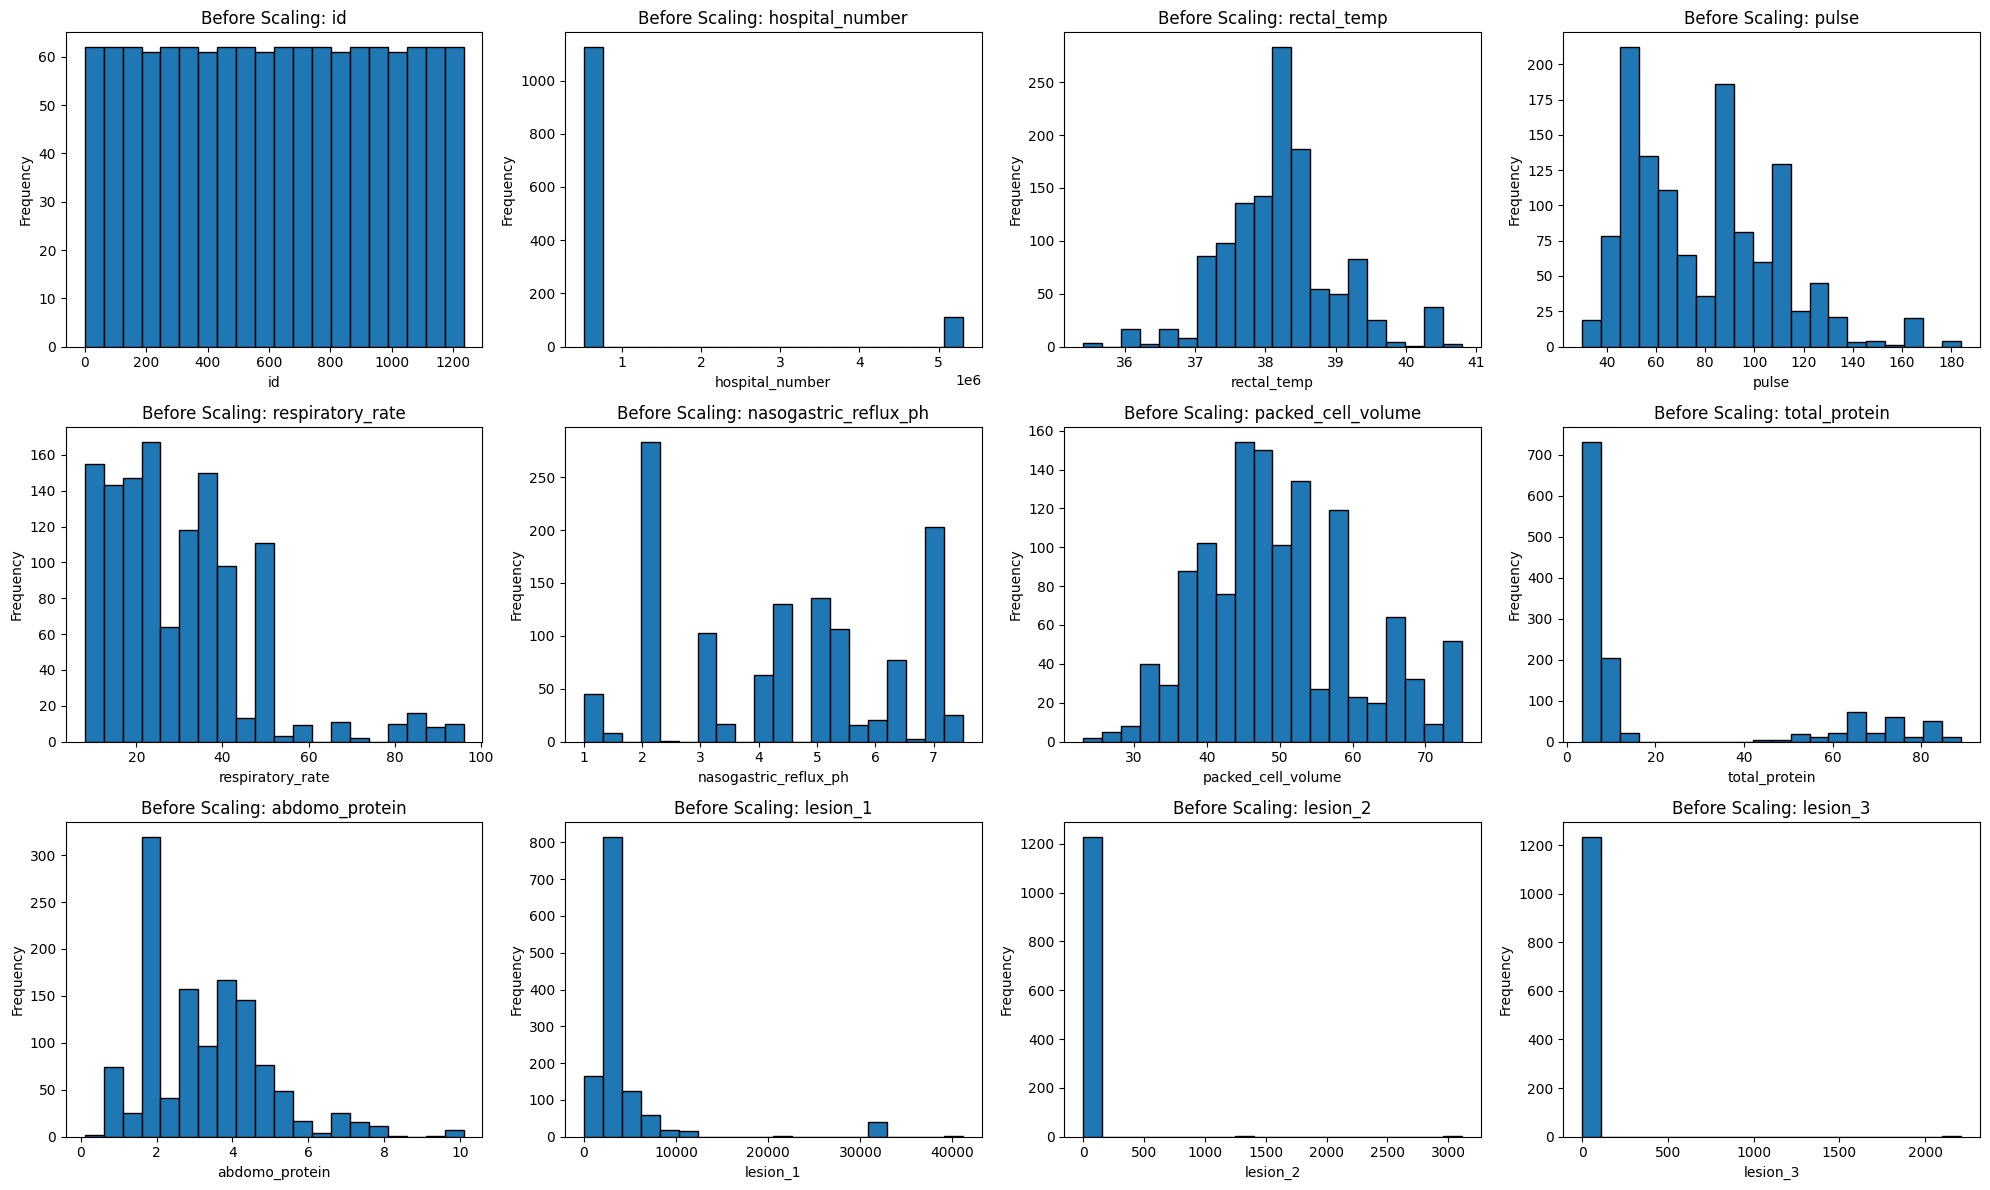

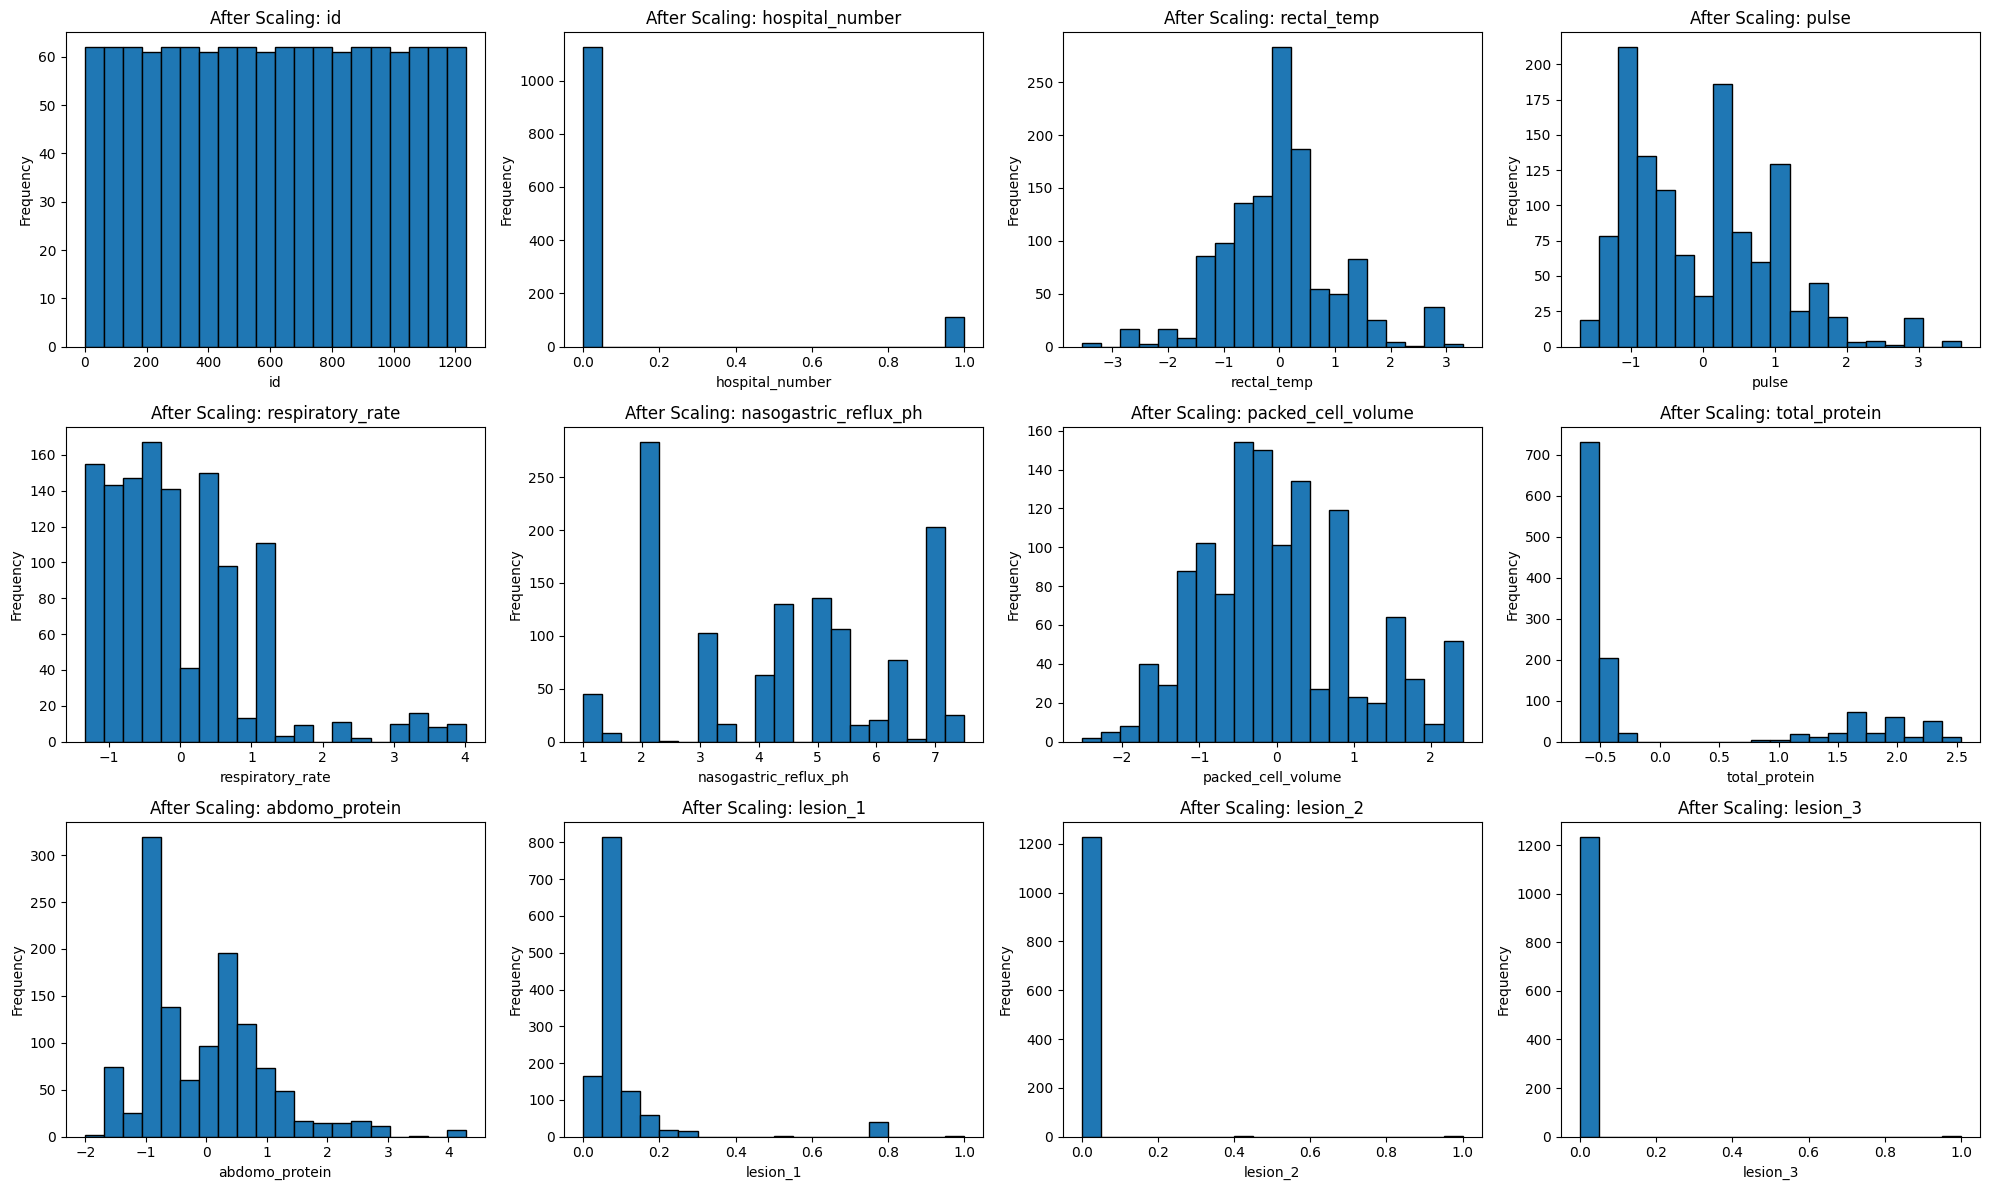

In [229]:
# Separate numerical features into StandardScaler and MinMaxScaler groups
standard_scaler_cols = [
    'rectal_temp', 'pulse', 'respiratory_rate',
    'packed_cell_volume', 'total_protein', 'abdomo_protein'
]
minmax_scaler_cols = ['hospital_number', 'lesion_1', 'lesion_2', 'lesion_3']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply standard scaling
df_standard_scaled = df_train[standard_scaler_cols]
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_standard_scaled), columns=standard_scaler_cols)

# Apply Min-Max scaling
df_minmax_scaled = df_train[minmax_scaler_cols]
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_minmax_scaled), columns=minmax_scaler_cols)

# Combine scaled data
df_scaled = df_train.copy()
df_scaled[standard_scaler_cols] = df_standard_scaled
df_scaled[minmax_scaler_cols] = df_minmax_scaled

# Function to visualize histograms
def plot_histograms(df_train, columns, title_prefix):
    plt.figure(figsize=(20, 12))
    for i, col in enumerate(columns):
        plt.subplot(3, 4, i + 1)
        plt.hist(df_train[col], bins=20, edgecolor='black')
        plt.title(f'{title_prefix}: {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot original distributions
plot_histograms(df_train, numerical_cols, 'Before Scaling')

# Plot scaled distributions
plot_histograms(df_scaled, numerical_cols, 'After Scaling')

## Machine Learning
### Problem Formulation

In [230]:
df_train.head(20)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome_died,outcome_euthanized,outcome_lived
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,serosanguious,3.4,yes,2209,0,0,no,True,False,False
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,serosanguious,2.0,yes,2208,0,0,no,False,True,False
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,serosanguious,3.4,yes,5124,0,0,no,False,False,True
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,cloudy,3.9,yes,2208,0,0,yes,False,False,True
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,cloudy,2.6,no,0,0,0,yes,False,False,True
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,cloudy,2.8,no,0,0,0,yes,False,False,True
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,...,cloudy,1.0,no,3111,0,0,yes,False,True,False
7,7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,...,serosanguious,4.5,yes,2207,0,0,yes,True,False,False
8,8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,...,cloudy,2.6,no,0,0,0,yes,False,False,True
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,...,cloudy,2.9,yes,3209,0,0,yes,True,False,False


In [231]:
# Remove ID-like features and original categorical columns
columns_to_remove = [
    'id', 'hospital_number', 'surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
    'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
    'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
    'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data'
]
df_clean = df_train.drop(columns=columns_to_remove)

In [233]:
# Split features and target
X = df_scaled.drop(columns=['outcome_died', 'outcome_euthanized', 'outcome_lived'])
y = df_scaled[['outcome_died', 'outcome_euthanized', 'outcome_lived']]

# Split into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temporary set into validation (15% overall) and test (15% overall) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the shapes of the resulting splits
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

(((864, 28), (185, 28), (186, 28)), ((864, 3), (185, 3), (186, 3)))

### Train ML Algorithm

In [235]:
## I wanted to redo some of the code because I was getting an error

# Identify numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Fill missing numerical values with the median
numerical_medians = {col: df_train[col].median() for col in numerical_cols}
df_train.fillna(numerical_medians, inplace=True)

# Fill missing categorical values with the mode
categorical_modes = {col: df_train[col].mode()[0] for col in categorical_cols}
df_train.fillna(categorical_modes, inplace=True)

# Check and remove duplicates
df_train.drop_duplicates(inplace=True)

# One-hot encode all categorical columns
df_train = pd.get_dummies(df_train, drop_first=True)

# Remove ID-like features
columns_to_remove = ['id', 'hospital_number']
df_clean = df_train.drop(columns=columns_to_remove)

# Separate numerical features into StandardScaler and MinMaxScaler groups
standard_scaler_cols = [
    'rectal_temp', 'pulse', 'respiratory_rate',
    'packed_cell_volume', 'total_protein', 'abdomo_protein'
]
minmax_scaler_cols = ['lesion_1', 'lesion_2', 'lesion_3']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply standard scaling
df_standard_scaled = df_clean[standard_scaler_cols]
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_standard_scaled), columns=standard_scaler_cols)

# Apply Min-Max scaling
df_minmax_scaled = df_clean[minmax_scaler_cols]
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_minmax_scaled), columns=minmax_scaler_cols)

# Combine scaled data
df_scaled = df_clean.copy()
df_scaled[standard_scaler_cols] = df_standard_scaled
df_scaled[minmax_scaler_cols] = df_minmax_scaled

# Separate features and target
X = df_scaled.drop(columns=['outcome_died', 'outcome_euthanized', 'outcome_lived'])
y = df_scaled[['outcome_died', 'outcome_euthanized', 'outcome_lived']]

# Split into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temporary set into validation (15% overall) and test (15% overall) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred, target_names=['died', 'euthanized', 'lived'])

# Print the results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_classification_report)

Validation Accuracy: 0.5730
Validation Classification Report:
              precision    recall  f1-score   support

        died       0.67      0.56      0.61        61
  euthanized       0.82      0.47      0.60        38
       lived       0.79      0.63      0.70        86

   micro avg       0.75      0.57      0.65       185
   macro avg       0.76      0.55      0.64       185
weighted avg       0.76      0.57      0.65       185
 samples avg       0.57      0.57      0.57       185



/home/youngsai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Evaluate Performance on Validation Sample

In [86]:
X_val = val.drop('outcome', axis=1)
y_val = val['outcome']

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)

# If the target has more than two classes, we need to binarize it for AUC-ROC calculation
classes = np.unique(y_val)
y_val_bin = label_binarize(y_val, classes=classes)

# Compute accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on Validation Set:", accuracy)

# Compute AUC-ROC Score using One-vs-Rest approach
auc_roc_ovr = roc_auc_score(y_val_bin, y_pred_proba, multi_class='ovr', average='macro')
print("AUC-ROC Score (One-vs-Rest):", auc_roc_ovr)

# Detailed classification report
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy on Validation Set: 0.6680161943319838
AUC-ROC Score (One-vs-Rest): 0.8243523207805245
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70        81
           1       0.54      0.43      0.48        49
           2       0.75      0.69      0.72       117

    accuracy                           0.67       247
   macro avg       0.64      0.63      0.63       247
weighted avg       0.67      0.67      0.66       247



In [238]:
# Separate features and target
X = df_scaled.drop(columns=['outcome_died', 'outcome_euthanized', 'outcome_lived'])
y_multilabel = df_scaled[['outcome_died', 'outcome_euthanized', 'outcome_lived']]
y_singlelabel = y_multilabel.idxmax(axis=1).replace({
    'outcome_died': 'died',
    'outcome_euthanized': 'euthanized',
    'outcome_lived': 'lived'
})

# Split into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_singlelabel, test_size=0.3, random_state=42, stratify=y_singlelabel)

# Split temporary set into validation (15% overall) and test (15% overall) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize and train the RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

# Make predictions on the validation set using RandomForest
y_val_pred_rf = clf_rf.predict(X_val)

# Evaluate the performance on the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_classification_report_rf = classification_report(y_val, y_val_pred_rf, target_names=['died', 'euthanized', 'lived'])

# Initialize and train the LogisticRegression
clf_lr = LogisticRegression(multi_class='ovr', random_state=42, max_iter=1000)
clf_lr.fit(X_train, y_train)

# Make predictions on the validation set using LogisticRegression
y_val_pred_lr = clf_lr.predict(X_val)

# Evaluate the performance on the validation set
val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
val_classification_report_lr = classification_report(y_val, y_val_pred_lr, target_names=['died', 'euthanized', 'lived'])

# Print the results
print("RandomForestClassifier Results:")
print(f"Validation Accuracy: {val_accuracy_rf:.4f}")
print("Validation Classification Report:")
print(val_classification_report_rf)

print("\nLogisticRegression Results:")
print(f"Validation Accuracy: {val_accuracy_lr:.4f}")
print("Validation Classification Report:")
print(val_classification_report_lr)

RandomForestClassifier Results:
Validation Accuracy: 0.6541
Validation Classification Report:
              precision    recall  f1-score   support

        died       0.60      0.79      0.68        61
  euthanized       0.66      0.50      0.57        38
       lived       0.71      0.63      0.67        86

    accuracy                           0.65       185
   macro avg       0.66      0.64      0.64       185
weighted avg       0.66      0.65      0.65       185


LogisticRegression Results:
Validation Accuracy: 0.6811
Validation Classification Report:
              precision    recall  f1-score   support

        died       0.68      0.72      0.70        61
  euthanized       0.62      0.47      0.54        38
       lived       0.70      0.74      0.72        86

    accuracy                           0.68       185
   macro avg       0.67      0.65      0.65       185
weighted avg       0.68      0.68      0.68       185



### Apply ML to the challenge test set

In [249]:
# Load the test dataset
test_file_path = 'test.csv'
df_test = pd.read_csv(test_file_path)

# Identify numerical and categorical columns in the test dataset
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_test = df_test.select_dtypes(include=['object']).columns

# Fill missing numerical values with the median using training medians
numerical_medians_test = {col: df_test[col].median() for col in numerical_cols_test}
df_test.fillna(numerical_medians_test, inplace=True)

# Fill missing categorical values with the mode using training modes
categorical_modes_test = {col: df_test[col].mode()[0] for col in categorical_cols_test}
df_test.fillna(categorical_modes_test, inplace=True)

# One-hot encode the categorical columns (align with training set columns)
df_test = pd.get_dummies(df_test, drop_first=True)

# Ensure the test dataset has the same columns as the training dataset
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0
df_test = df_test[X_train.columns]

# Apply the same scaling used for training to the test dataset
df_test_standard = df_test[standard_scaler_cols]
df_test_standard = pd.DataFrame(standard_scaler.transform(df_test_standard), columns=standard_scaler_cols)

df_test_minmax = df_test[minmax_scaler_cols]
df_test_minmax = pd.DataFrame(minmax_scaler.transform(df_test_minmax), columns=minmax_scaler_cols)

# Combine scaled data for the test dataset
df_test_scaled = df_test.copy()
df_test_scaled[standard_scaler_cols] = df_test_standard
df_test_scaled[minmax_scaler_cols] = df_test_minmax

# Predict using the trained Logistic Regression model
test_predictions_lr = clf_lr.predict(df_test_scaled)

# Predict using the trained Random Forest model
test_predictions_rf = clf_rf.predict(df_test_scaled)

# Reload the test dataset to include the ID column
df_test_original = pd.read_csv(test_file_path)

# Create a DataFrame to compare predictions
predictions_df = pd.DataFrame({
    'id': df_test_original['id'],
    'LogisticRegression_Prediction': test_predictions_lr,
    'RandomForest_Prediction': test_predictions_rf
})

# Display the first few rows of the predictions DataFrame
predictions_df.head(10)

,id,LogisticRegression_Prediction,RandomForest_Prediction
0,1235,lived,lived
1,1236,died,died
2,1237,lived,lived
3,1238,euthanized,euthanized
4,1239,lived,lived
5,1240,died,died
6,1241,died,died
7,1242,died,died
8,1243,lived,lived
9,1244,lived,lived
